In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
import random
import re
import os

In [4]:
print("Tensorflow Version",tf.__version__)
df = pd.read_csv('train.csv', encoding='latin', header=None)
df.head()

Tensorflow Version 2.18.0


,0,1
0,5,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...


In [5]:
df.columns = [ 'sentiment', 'text']
df.head()

,sentiment,text
0,5,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...


In [6]:
lab_to_sentiment = {0:"Negative",1:"Negative", 2:"Negative" , 3:"Positive",4:"Positive",5:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Positive,dr. goldberg offers everything i look for in a...
1,Negative,"Unfortunately, the frustration of being Dr. Go..."
2,Positive,Been going to Dr. Goldberg for over 10 years. ...
3,Positive,Got a letter in the mail last week that said D...
4,Negative,I don't know what Dr. Goldberg was like before...


Text(0.5, 1.0, 'Sentiment Data Distribution')

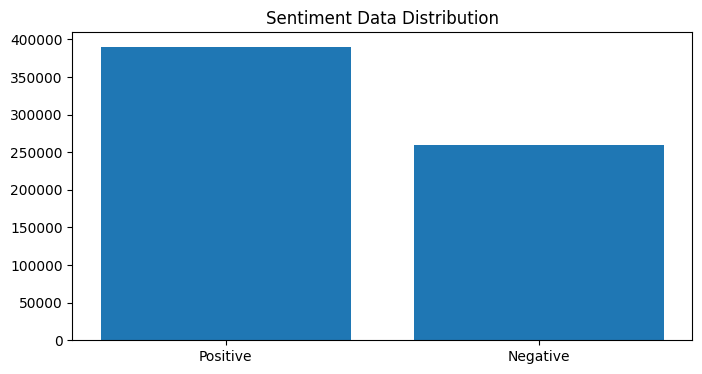

In [7]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [8]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10)

,sentiment,text
7909,Positive,I ALWAYS seem to have a lay over here when I'm...
131635,Negative,I have been to my share of Benihana's and this...
181360,Negative,Ew. I am just judging one crepe (the vegetaria...
306175,Negative,The good..\n1) Beautiful place\n2) Excellent s...
249290,Positive,I usually play basketball at around 11:00 am a...
490676,Positive,food is decent. it is very busy place but serv...
311143,Positive,"Good food and service. Not the best, but a lot..."
536059,Negative,I'm not sure if Ms Kim's approach to her cooki...
408273,Positive,Love this place for their Chile lime churrasco...
512068,Positive,The service we received from Arborscape was in...


In [9]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\manik\AppData\Local\Temp\ipykernel_20428\3341848437.py:4: SyntaxWarning: invalid escape sequence '\S'
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


In [10]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [11]:
df.text = df.text.apply(lambda x: preprocess(x))

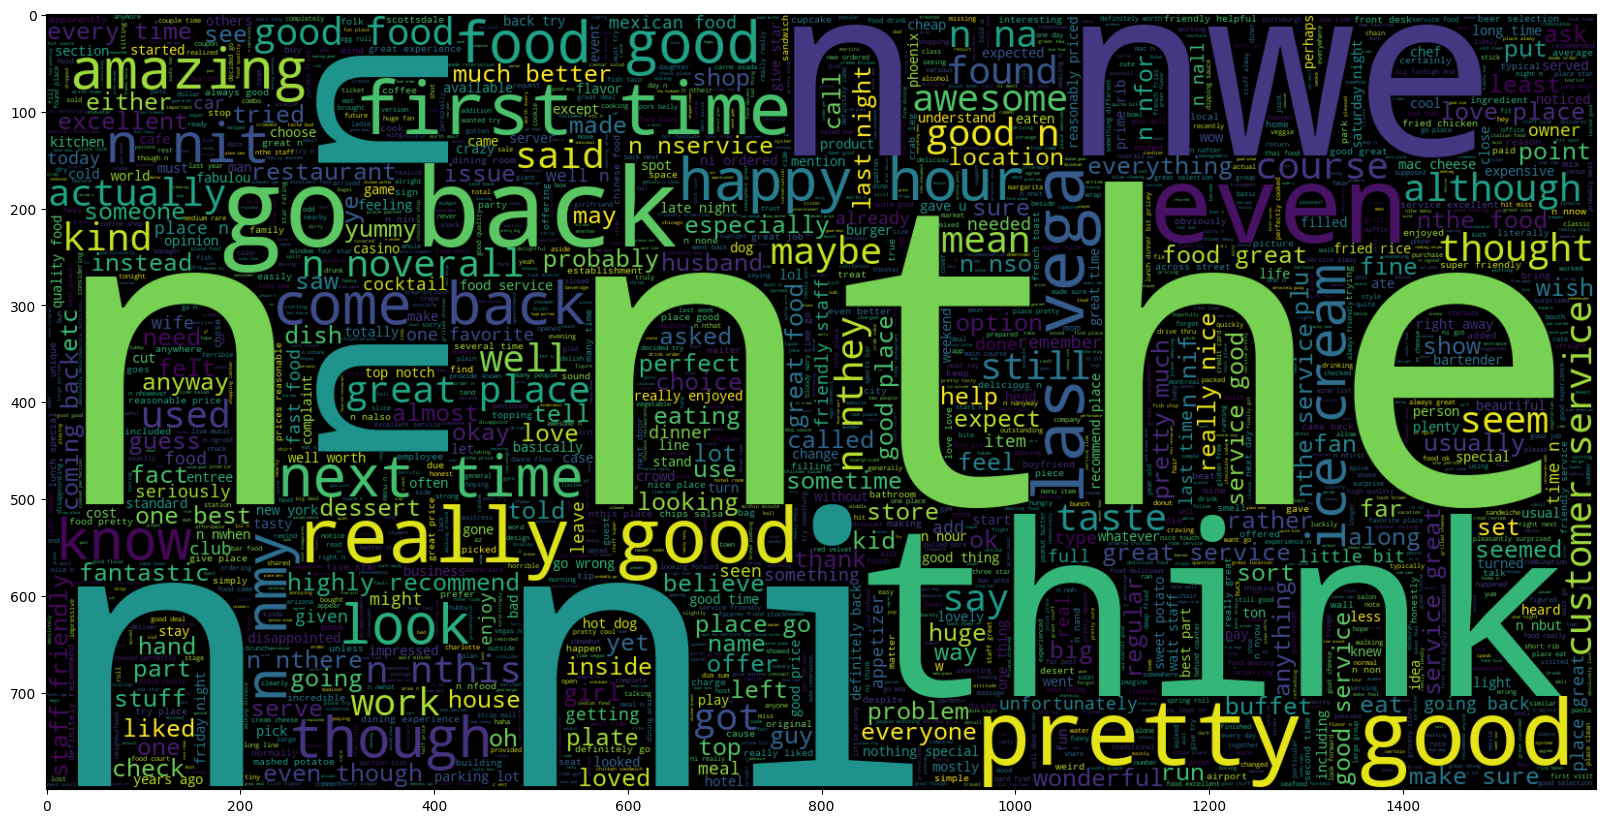

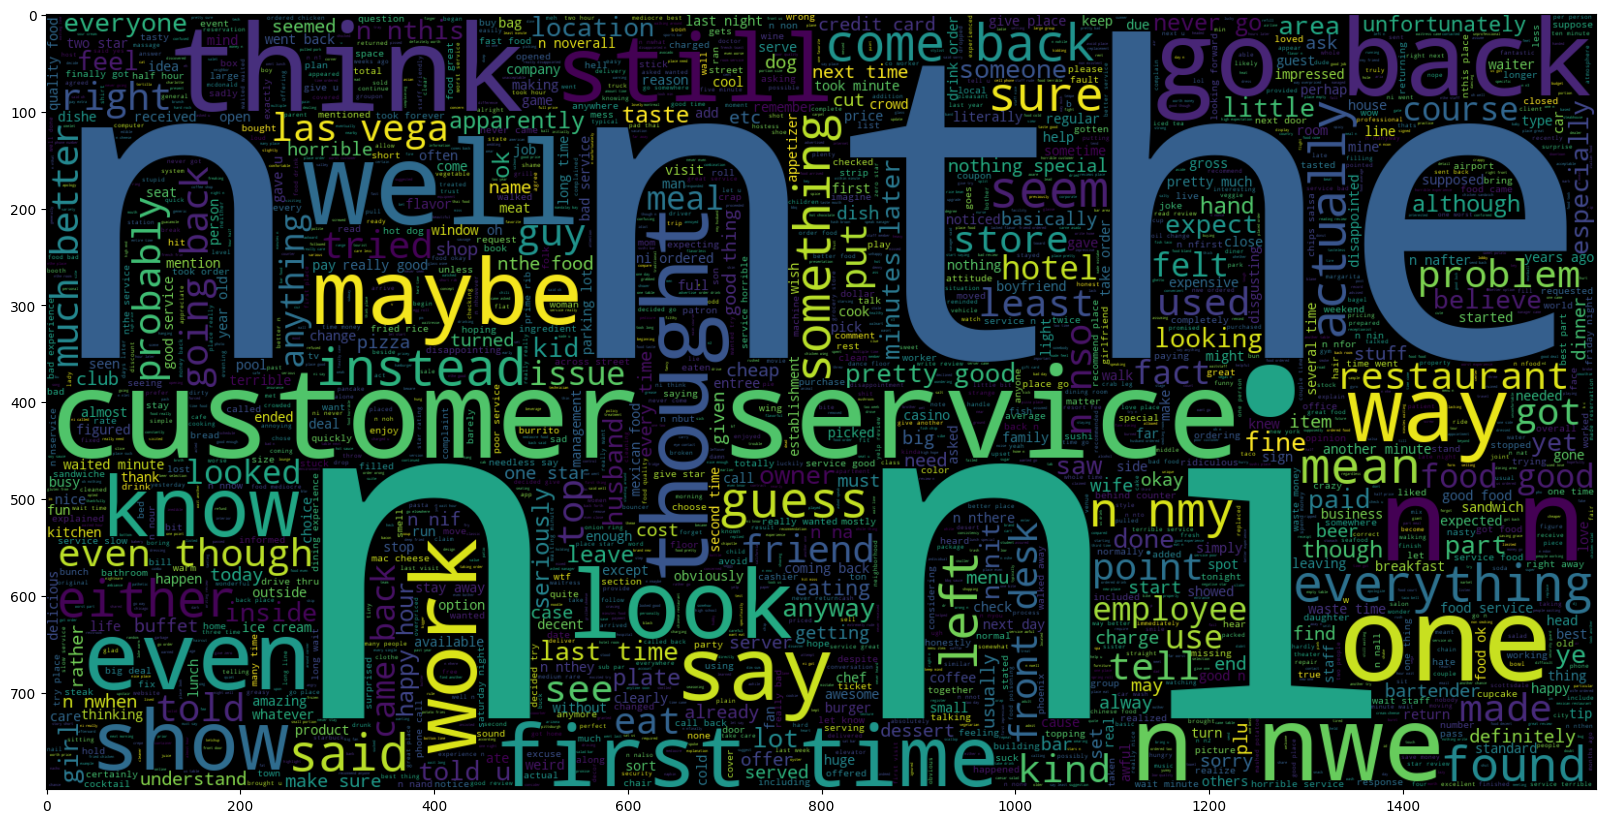

In [12]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')


plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [13]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30


In [14]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 520000
Test Data size 130000


In [15]:
labels = train_data.sentiment.unique().tolist()

In [16]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (520000, 1)
y_test shape: (130000, 1)


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 211972


In [18]:
import pickle

# Save the tokenizer to a file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [19]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (520000, 30)
Testing X Shape: (130000, 30)


In [20]:
print(x_test)

[[  368  1363   140 ...   222   106  5997]
 [  682   274  1213 ...    40   782   276]
 [ 4461  3725  5161 ...    38   147    11]
 ...
 [    1 12764   856 ... 26181   662  3312]
 [  198  1558   239 ...  4161  1059     5]
 [ 7365    17    26 ...  1329   165    67]]


In [21]:
import requests
import zipfile
import os

In [22]:
GLOVE_EMB = 'glove.6B.300d.txt'

EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'


In [23]:
embeddings_index = {}

f =  open(GLOVE_EMB,encoding='utf-8')
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [24]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [25]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

c:\Users\manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [29]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [31]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


In [32]:

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 66s 124ms/step - accuracy: 0.7520 - loss: 0.4950 - val_accuracy: 0.8166 - val_loss: 0.3965 - learning_rate: 0.0010
Epoch 2/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 119s 235ms/step - accuracy: 0.8101 - loss: 0.4099 - val_accuracy: 0.8244 - val_loss: 0.3794 - learning_rate: 0.0010
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 153s 301ms/step - accuracy: 0.8204 - loss: 0.3916 - val_accuracy: 0.8303 - val_loss: 0.3720 - learning_rate: 0.0010
Epoch 4/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 153s 302ms/step - accuracy: 0.8267 - loss: 0.3786 - val_accuracy: 0.8304 - val_loss: 0.3692 - learning_rate: 0.0010
Epoch 5/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 154s 303ms/step - accuracy: 0.8301 - loss: 0.3723 - val_accuracy: 0.8355 - val_loss: 0.3616 - learning_rate: 0.0010
Epoch 6/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 204s 307ms/step - accuracy: 0.8340 - loss: 0.3655 - val_accuracy: 0.8369 - val_loss: 0.3597 - learning_rate: 0.0010
Epoch 7/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 201s 304ms/step - accurac

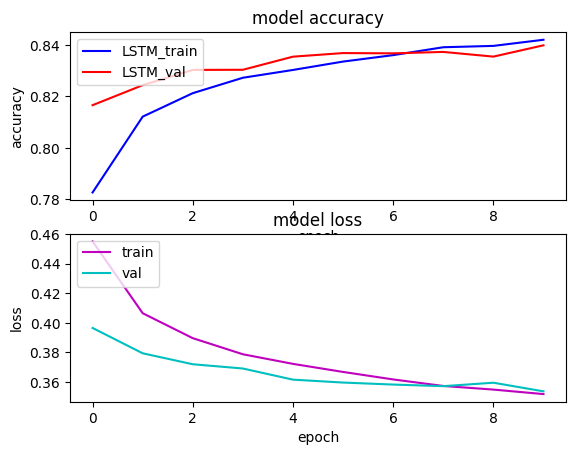

In [33]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [34]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 995ms/step


In [35]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

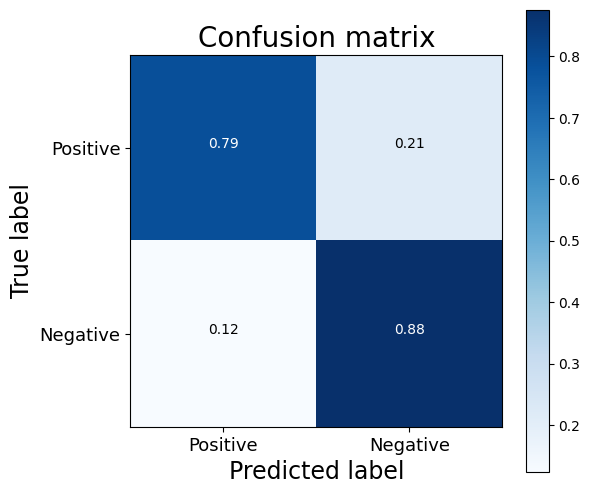

In [36]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [37]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.81      0.79      0.80     51935
    Positive       0.86      0.88      0.87     78065

    accuracy                           0.84    130000
   macro avg       0.83      0.83      0.83    130000
weighted avg       0.84      0.84      0.84    130000



In [38]:
df.shape

(650000, 2)

In [44]:
df['sentiment'].value_counts()

sentiment
Positive    390000
Negative    260000
Name: count, dtype: int64

In [39]:
from nltk.stem import PorterStemmer
port_steam = PorterStemmer()

In [40]:
def stemming(content):
    stemmer = nltk.SnowballStemmer('english')
    stemmed_content = content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [41]:
X = df['text'].values
Y = df['sentiment'].values

In [42]:
print(X)

['dr goldberg offers everything look general practitioner nice easy talk without patronizing always time seeing patients affiliated top notch hospital nyu parents explained important case something happens need surgery get referrals see specialists without see first really need sitting trying think complaints really drawing blank'
 'unfortunately frustration dr goldberg patient repeat experience many doctors nyc good doctor terrible staff seems staff simply never answers phone usually takes 2 hours repeated calling get answer time wants deal run problem many doctors get office workers patients medical needs anyone answering phone incomprehensible work aggravation regret feel give dr goldberg 2 stars'
 'going dr goldberg 10 years think one 1st patients started mhmg great years really big picture former gyn dr markoff found fibroids explores options patient understanding judge asks right questions thorough wants kept loop every aspect medical health life'
 ...
 'looks like good reviews g

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(650000,) (520000,) (130000,)


In [54]:
print(X_train)
print(Y_train)

['cons n n long wait time outside pass security las vegas waiting outside summer enjoyable experience n parking site parking lot even downtown parking n inside cell phone use reading material boring n npositives n n two visits irs agents friendly helpful n n modern building although waiting boring interior dismal depressing factor nonexistent n nrecommendations n n park downtown casino walk vigitantly alongside north sidewalk along ogden street passes railroad tunnel money save parking treat good meal afterwards recommend main street buffet n n try get opening time avoid long line outside n n bring good book magazine cell phone use prohibited n n careful filing taxes end'
 'giving 2 stars smoke inside casino thick could cut knife hotel ok place visit bowling alley movie theatre nice buffet ok great due smoke sore throat whole time also remodeling rooms close mine really annoying due loud hand tools'
 'food amazing service quick many different plates makes one stop shop fill sure'
 ...


In [55]:
print(X_train)

['cons n n long wait time outside pass security las vegas waiting outside summer enjoyable experience n parking site parking lot even downtown parking n inside cell phone use reading material boring n npositives n n two visits irs agents friendly helpful n n modern building although waiting boring interior dismal depressing factor nonexistent n nrecommendations n n park downtown casino walk vigitantly alongside north sidewalk along ogden street passes railroad tunnel money save parking treat good meal afterwards recommend main street buffet n n try get opening time avoid long line outside n n bring good book magazine cell phone use prohibited n n careful filing taxes end'
 'giving 2 stars smoke inside casino thick could cut knife hotel ok place visit bowling alley movie theatre nice buffet ok great due smoke sore throat whole time also remodeling rooms close mine really annoying due loud hand tools'
 'food amazing service quick many different plates makes one stop shop fill sure'
 ...


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
print(type(X_train))

<class 'numpy.ndarray'>


In [58]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [59]:
print(X_test)

  (0, 4720)	0.19402458567874117
  (0, 8012)	0.09806566940895076
  (0, 9280)	0.11756927212183793
  (0, 11217)	0.0955742694091254
  (0, 26226)	0.13535428284790574
  (0, 27508)	0.25723945971236867
  (0, 34252)	0.13259167327097354
  (0, 43175)	0.10540383917465901
  (0, 47953)	0.08763747265495453
  (0, 55533)	0.12357369152067778
  (0, 61741)	0.08458974956889238
  (0, 65095)	0.10648605767155381
  (0, 66352)	0.11976042587236035
  (0, 72424)	0.059006724871871113
  (0, 73874)	0.06172331317839131
  (0, 74641)	0.21589614966789575
  (0, 75435)	0.18123870813372417
  (0, 77773)	0.4548525258296607
  (0, 99132)	0.10477913401482865
  (0, 99928)	0.09486426952134015
  (0, 100717)	0.09126924491546037
  (0, 102665)	0.12386806037993935
  (0, 102865)	0.11943446626837692
  (0, 110571)	0.12751201872700535
  (0, 122509)	0.07133637594307007
  :	:
  (129999, 168476)	0.07669611889382734
  (129999, 169633)	0.13738492272241518
  (129999, 173190)	0.1073536427310763
  (129999, 173272)	0.07349365296554247
  (129999, 17

In [60]:
print(X_train)

  (0, 41222)	0.11948309992079083
  (0, 100250)	0.11148342763841919
  (0, 203772)	0.053579657769040126
  (0, 185915)	0.07414234542981321
  (0, 138126)	0.19599255749211766
  (0, 140980)	0.08537670838058249
  (0, 165624)	0.09224726446150866
  (0, 96843)	0.07242376037874802
  (0, 200712)	0.05238077387299293
  (0, 203801)	0.13090767765740188
  (0, 179192)	0.08914072493619503
  (0, 58481)	0.09737866912755375
  (0, 61741)	0.0515490144073252
  (0, 140520)	0.2888405771944289
  (0, 169872)	0.099157842347767
  (0, 100717)	0.055619500531338004
  (0, 60626)	0.04291760775909443
  (0, 53631)	0.16950454558360548
  (0, 87338)	0.06341297834747339
  (0, 33559)	0.21547588953637506
  (0, 143824)	0.1493988330429493
  (0, 199631)	0.1299099445303453
  (0, 153718)	0.08682477798119259
  (0, 104929)	0.12618626417520978
  (0, 26035)	0.1885630598280479
  :	:
  (519999, 75525)	0.10200774147045301
  (519999, 197715)	0.10271354472503602
  (519999, 137076)	0.10477290623924689
  (519999, 165670)	0.0702492121993579
  (5

In [61]:
import pickle

# Save the model
filename = 'trained_movie_hotel.sav'
pickle.dump(model, open(filename, 'wb'))



In [62]:
# loading the saved model
loaded_model = pickle.load(open('trained_movie_hotel.sav', 'rb'))

In [63]:
def preprocess(text, stem=False):
    text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\manik\AppData\Local\Temp\ipykernel_20428\1460555962.py:2: SyntaxWarning: invalid escape sequence '\S'
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


In [64]:
custom_text = "I really love this product! It’s amazing."

# Preprocess the text
cleaned_text = preprocess(custom_text)

# Tokenize and pad the text
custom_text_sequence = tokenizer.texts_to_sequences([cleaned_text])  # Tokenize
custom_text_padded = pad_sequences(custom_text_sequence, maxlen=MAX_SEQUENCE_LENGTH)  # Pad

In [65]:
score = model.predict(custom_text_padded)

# Decode the sentiment
predicted_sentiment = decode_sentiment(score[0][0])

# Output the result
print(f"Custom Text: {custom_text}")
print(f"Predicted Sentiment: {predicted_sentiment} (Score: {score[0][0]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
Custom Text: I really love this product! It’s amazing.
Predicted Sentiment: Positive (Score: 0.9796687364578247)


In [66]:
# Load the tokenizer from the file
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

def predict_sentiment(custom_text, tokenizer, model, max_sequence_length=50):
    # Preprocess the input text
    cleaned_text = preprocess(custom_text)

    # Tokenize and pad the input text to match model input
    custom_text_sequence = tokenizer.texts_to_sequences([cleaned_text])
    custom_text_padded = pad_sequences(custom_text_sequence, maxlen=max_sequence_length)

    # Predict sentiment
    score = model.predict(custom_text_padded)

    # Decode the sentiment
    pos_score = score[0][0]
    neg_score = 1 - score[0][0]

    positive_percent =  pos_score * 100
    negitive_percent =  neg_score * 100

    def decode_sentiment(score):
        return "Positive" if score > 0.5 else "Negative"

    predicted_sentiment = decode_sentiment(score[0][0])

    # Output the result
    return {
        'custom_text': custom_text,
        'predicted_sentiment': predicted_sentiment,
        'positive_percent': positive_percent,
        'negitive_percent' : negitive_percent
    }

In [67]:
# custom_input = "The product arrived on time, and the packaging was great, but it doesn’t work as advertised. Really disappointed. 😕 #MixedFeelings"
custom_input ="i love you my country"
result = predict_sentiment(custom_input, tokenizer, model)
 
print(f"input: {result['custom_text']}")
print(f"output: {result['predicted_sentiment']}")
print(f"Percent positive : {result['positive_percent']:.2f}%")
print(f"Percent negative : {result['negitive_percent']:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
input: i love you my country
output: Positive
Percent positive : 96.92%
Percent negative : 3.08%
